<a href="https://colab.research.google.com/github/marcelorandolfo/data-science/blob/master/Analisando_os_Dados_do_Airbnb_Hawaii_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Hawaii

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes a um dos estados mais conhecidos dos Estados Unidos, o Hawaii. O objetivo é extrair insights valiosos quanto a oferta de imóveis no estado.**



## Breve contexto sobre o Hawaii


O estado norte americano do **Hawaii** é um arquipélago localizado no meio do Oceano Pacífico, sendo considerado o estado mais isolado em relação ao restante do país. O arquipélago é composto de seis ilhas principais: [Kauai](https://www.gohawaii.com/islands/kauai), [Oahu](https://www.gohawaii.com/islands/oahu), [Molokai](https://www.gohawaii.com/islands/molokai),
[Maui](https://https://www.gohawaii.com/islands/maui), [Lanai](https://www.gohawaii.com/islands/lanai) e [Ilha do Hawaii](https://www.gohawaii.com/islands/hawaii-big-island). Cada ilha possui sua própria característica, mas dentre elas, destacam-se as ilhas **Molokai**, **Oahu** e **Lanai**.

**Molokai** é conhecida por manter a tradição dos povos nativos do Hawaii. A população que vive na ilha é majoritariamente composta por nativos, que preservam o estilo rural de seus antepassados. 

**Oahu** por sua vez, contrapõe essa característica de forte ligação com a cultura ancestral. A ilha é considerada como a mais variada em termos de diversidade populacional, abrangendo desde cidades com vida agitada até paraísos do surfe. A capital do estado do Hawaii, Honolulu, está localizada na ilha de **Oahu**. 

Por fim, **Lanai** distingue-se das demais ilhas devido a presença de resorts extremamente luxuosos.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Hawaii (good for visualisations).*
  * *Data Compiled: 12 September, 2019.* 



In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/hi/hawaii/2019-09-12/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id`: número de identificação do imóvel.
* `name`: nome do imóvel anunciado
* `host_id`: número de identificação do anfitrião do imóvel.
* `host_name`: nome do anfitrião do imóvel.
* `neighbourhood_grupo`: nome do grupo no qual o bairro do imóvel em questão está localizado.
* `neighbourhood`: nome do bairro do imóvel.
* `latitude`: coordenada latitudinal do imóvel.
* `longitude`: coordenada longitudinal do imóvel.
* `room_type`: tipo do imóvel que está sendo anunciado.
* `price`: preço de uma diária no imóvel.
* `minimum_nights`: número de noites mínimas necessárias para alugar o imóvel.
* `number_of_reviews`: número de reviews que o imóvel possui.
* `last review`: data da última review que o imóvel recebeu.
* `reviews_per_month`: número de reviews por mês.
* `calculated_host_listings_count`: quantidade de imóveis anunciados que o anfitrião do imóvel possui.
* `availability_365`: número de dias no ano em que o imóvel fica disponível para locação.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas e as 5 últimas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",3364,Lynne,Honolulu,Primary Urban Center,21.27603,-157.82210,Private room,69,1,234,2019-08-28,2.09,1,35
1,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,37,2019-08-19,0.46,2,363
2,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02621,-155.70145,Entire home/apt,97,2,5,2019-09-04,0.05,7,333
3,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,92,5,159,2019-07-15,1.36,3,286
4,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,299,6,15,2019-08-17,0.21,3,256


In [0]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23447,38553427,Seaside Escape,93069241,Andrew,Honolulu,East Honolulu,21.27817,-157.74902,Entire home/apt,445,2,0,NaN,NaN,12,256
23448,38555583,the ELEPHANT ROOM of WAIKIKI,60832928,Bj,Honolulu,Primary Urban Center,21.27748,-157.82566,Entire home/apt,159,2,0,NaN,NaN,17,180
23449,38558001,Quaint Home in North Kohala,294196064,An,Hawaii,North Kohala,20.23344,-155.81403,Entire home/apt,95,1,0,NaN,NaN,1,365
23450,38559093,SPECTACULAR OCEAN VIEW,292467425,Martina,Maui,Lahaina,20.96945,-156.67964,Entire home/apt,379,4,0,NaN,NaN,2,357
23451,38560079,"Scenic, Private Bedroom Condo in Heart of Kona",31252899,Caroline,Hawaii,North Kona,19.62039,-155.98413,Private room,85,1,0,NaN,NaN,1,72


### **Q1. Quantos atributos (variáveis) e quantas entradas (observações) o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas e variáveis que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print('Número de entradas:\t {}'.format(df.shape[0]))
print('Número de variáveis:\t {}\n'.format(df.shape[1]))

# identificar os tipos das variáveis
display(df.dtypes)

Número de entradas:	 23452
Número de variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.238871
last_review                       0.238871
host_name                         0.000043
name                              0.000043
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Pelos resultados é possível observar que o dataset está bem completo, com pouquíssimos valores ausentes. 

Somente as as variáveis `reviews_per_month` e `last_review` possuem um valor alto de valores ausentes. Uma explicação possível nesse caso é a de que o imóvel ainda não tenha recebido nenhuma review. Para testar essa hipótese, iremos somar os valores da variável `number_of_review` onde `reviews_per_month`e `last_review` são valores nulos. Se o valor da soma for igual a zero, a hipótese é confirmada, caso contrário, houve algum erro na construção do dataset.

Mas antes é necessário confirmar se as entradas em que a variável `reviews_per_month` é nula, são as mesmas em que a variável `last_review` também é nula. Para isso serão realizados os seguintes passos:
* Dentro do dataset atual, selecionar somente as entradas em que a variável `reviews_per_month` é nula e a variável `last_review` é não nula.
* Calcular o tamanho desse dataset.
* Dentro do dataset atual, selecionar somente as entradas em que a variável `reviews_per_month` é não nula e a variável `last_review` é nula.
* Calcular o tamanho desse outro dataset.

Se o tamanho desses dois datasets forem iguais a zero, é possível afirmar que as entradas que possuem valores nulos na variável `reviews_per_month` são as mesmas que possuem valores nulos na variável `last_review`.

In [0]:
# identificar tamanho dos datasets:
print('Tamanho do dataset em que as entradas de reviews_per_month são nulas e last_review são não nulas:\t {}'.format(df[df['reviews_per_month'].isnull() & df['last_review'].notnull()].shape[0]))
print('Tamanho do dataset em que as entradas de reviews_per_month são não nulas e last_review são nulas:\t {}\n'.format(df[df['reviews_per_month'].notnull() & df['last_review'].isnull()].shape[0]))
print('Soma do número de reviews onde reviews_per_month e last_reviews são valores nulos:\t {}'.format(df['number_of_reviews'][df['reviews_per_month'].isnull() & df['last_review'].isnull()].sum()))

Tamanho do dataset em que as entradas de reviews_per_month são nulas e last_review são não nulas:	 0
Tamanho do dataset em que as entradas de reviews_per_month são não nulas e last_review são nulas:	 0

Soma do número de reviews onde reviews_per_month e last_reviews são valores nulos:	 0


Pelos resultados, confirma-se as duas hipóteses estabelecidas acima:
* As entradas onde `reviews_por_month` são nulas, são as mesmas onde `last_review`são nulas.
* A presença de valores nulos nessas variáveis não é devido a um erro do dataset e sim pelo fato de que o imóvel ainda não recebeu nenhuma review.

Essa análise de que `reviews_por_month` e `last_review` apresentam valores nulos nas mesmas entradas pode parecer óbvia. Mas não é. Por exemplo, ao analisar os valores ausentes do dataset, observamos que existe uma entrada onde a variável `host_name` é nula. O mesmo é observado para a variável `name`. Mas será que a entrada em que `host_name` é nula é a mesma em que `name` é nula? Para responder essa pergunta realizamos a mesma análise feita anteriormente.

In [0]:
# identificar tamanho dos datasets:
print('Tamanho do dataset em que host_name é um valor nulo e name não é nulo:\t {}'.format(df[df['host_name'].isnull() & df['name'].notnull()].shape[0]))
print('Tamanho do dataset em que host_name não é um valor nulo e name é nulo:\t {}\n'.format(df[df['host_name'].notnull() & df['name'].isnull()].shape[0]))

Tamanho do dataset em que host_name é um valor nulo e name não é nulo:	 1
Tamanho do dataset em que host_name não é um valor nulo e name é nulo:	 1



De acordo com o resultado é possível afirmar que a entrada onde a variável `host_name` é um valor ausente **não** é a mesma entrada onde a variavél `name` é um valor ausente.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar os respectivos histogramas. Porém, dentro do dataset existem quatro variáveis que são numéricas mas que não possuem nenhum significado lógico no histograma. Essas variáveis são: `host_id`, `id`, `latitude` e `longitude`. Logo, não serão plotados os histogramas dessas variáveis, somente das demais variáveis numéricas.

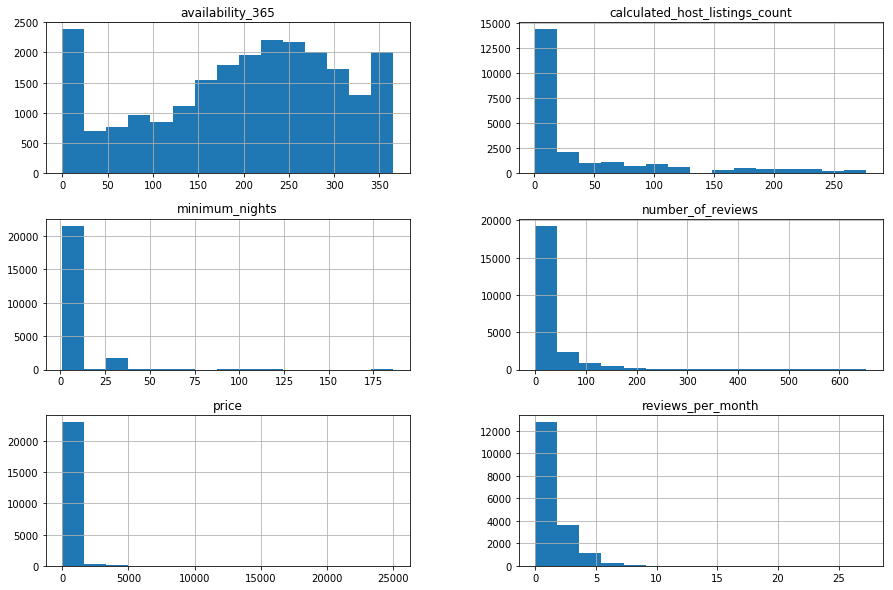

In [0]:
# plotar o histograma das variáveis numéricas
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']].hist(bins=15, figsize=(15,10));

De acordo com os histogramas é possível observar que:
* A distribuição da disponibilidade do imóvel no ano é relativamente uniforme. Há um número alto de imovéis com disponibilidade mais baixa, mas há muitos imovéis que ficam disponíveis por meio ano ou mais.

* Existem muitos anfitriões com poucos imovéis anunciados. Por outro lado, existem poucos anfitriões que são donos de vários imóveis. Esse formato da distribuição sugere a presença de *outliers*.
* Pela distribuição da variável `price` é possível inferir que há algum imóvel com preço bem elevado no dataset. Esse formato da distribuição da variável `price` também sugere a presença de *outliers*.
* A distribuição da variável `minimum_nights` suguere que para boa parte dos imóveis, não é necessário a locação por tantos dias. Porém, há alguns imóveis em que é necessário a locação mínima de meio ano. Esse formato da distribuição da variável `minimum_nights` também sugere a presença de *outliers*.
* A distribuição das variáveis `number_of_reviews` e `reviews_per_month` são bastante semelhantes. O que faz sentido, dado que quanto maior o número de reviews, maior será o número de reviews por mês. Além disso, o formato da distribuição de ambas as variáveis sugere a presença de *outliers*.

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*, onde somente no histograma da variável `availability_365` não há esses indícios. 

Os valores não seguem uma distruição bem definidia, e distorcem toda a representação gráfica. Para confirmar a presença de *outliers*, há duas maneiras rápidas que auxiliam a detecção. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas que tenham um sentido lógico para a análise
df[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].describe()

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
count,23452.000000,23452.000000,23452.000000,17850.000000,23452.000000,23452.000000
mean,43.081614,5.390628,334.138581,1.407922,24.600461,199.038760
std,67.593206,10.632728,708.002354,1.526086,44.758354,106.107197
min,1.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,2.000000,1.000000,126.000000,0.320000,1.000000,127.000000
50%,7.000000,3.000000,199.000000,0.910000,6.000000,215.000000
75%,59.000000,5.000000,335.000000,2.020000,29.000000,281.000000
max,277.000000,186.000000,24999.000000,27.270000,653.000000,365.000000


A partir do resumo estatístico é possível observar que:
* A variável `calculated_host_listings_count` possui uma média de aproximadamente 43, sendo que 75% dos valores estão abaixo de 59. Mas o valor máximo é 277. Nesse caso, as informações presentes no quarto quartil da amostra apresentam uma dispersão elevada. Essas características reforçam a hipótese de presença de *outliers*.
* A média de `minimum_nights` é aproximadamente 5. Além disso, 75% dos imóveis tem como número mínimo de noites para locação valores menores ou iguais a 5. Mas o *range* de valores dentro do quarto quartil vai de 5 até 186 noites, uma dispersão bastante elevada. Mais uma vez, essa característica reforça a hipótese de *outliers*.
* Analisando a variável `price` é possível perceber dois problemas. O primeiro é que as medidas estatísticas da variável reforçam a presença de *outliers*. A média da variável está maior que a mediana, além disso, o *range* do quarto quartil vai de 335 até 24999. Esses valores elevados acabam por elevar a média. O segundo problema está no valor mínimo do preço. Não faz sentido um imóvel ser anunciado com o preço igual a zero.
* As medidas para a variável `number_of_reviews` indicam o mesmo problema das variáveis anteriores: valores muito elevados no quarto quartil. Esse problema acaba sendo passado para a variável `reviews_per_month`.
* As medidas da variável `availability_365` não apresentam indícios de *outliers*, dado que os valores de *range* nos quartis não são muito dispersos. Porém, assim como na variável `price`, a variável `availability_365` apresenta um valor mínimo de 0. Se um imóvel está sendo anunciado no *Airbnb*, o que se espera é que ele esteja disponível para locação pelo menos em um dia do ano.

O método `describe` reforçou a hipótese de *outliers*, além de apresentar outros problemas. Uma outra forma de auxiliar na identificação de *outliers* é pela análise do `boxplot`. O `boxplot` segue a seguinte estrutura: 

<center><img alt="bp" width="60%" src="https://drive.google.com/uc?id=1-5O80O8L3GXNvQD7bI3RmO7EHbn84sJ_"></center>


Nesse caso, se um valor é maior que o valor do terceiro quartil mais uma vez e meia o intervalo interquartil (limite superior) ou menor que o valor do primeiro quartil menos uma vez e meia o intervalo interquartil (limite inferior), o valor é considerado, por definição, um *outlier*. Logo, em um `boxplot` os valores identificados como pontos são *outliers*. Nesse caso, vamos plotar os `boxplots` das variáveis `calculated_host_listings_count`, `minimum_nights`, `price` e `number_of_reviews` para confirmar a presença de *outliers*.

#### Boxplot para `calculated_host_listings_count`

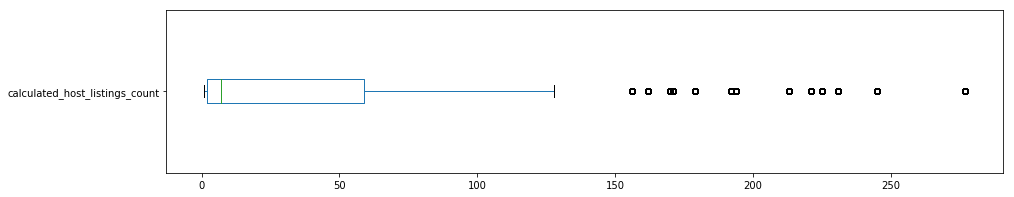


Cálculo de outliers para calculated_host_listings_count
Limite superior: 144.5
2636 entradas
11.2400%


In [0]:
# calculated_host_listings_count
df['calculated_host_listings_count'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores considerados por definição como outliers para calculated_host_listings_count
q3_soma_iiq_calculated_host = df['calculated_host_listings_count'].quantile(.75) + 1.5*(df['calculated_host_listings_count'].quantile(.75) - df['calculated_host_listings_count'].quantile(.25))
print("\nCálculo de outliers para calculated_host_listings_count")
print("Limite superior: {}".format(q3_soma_iiq_calculated_host))
print("{} entradas".format(len(df[df['calculated_host_listings_count'] > q3_soma_iiq_calculated_host])))
print("{:.4f}%".format((len(df[df['calculated_host_listings_count'] > q3_soma_iiq_calculated_host]) / df.shape[0])*100))

De acordo com o `boxplot` da variável é possível observar que valores superiores a 150 foram considerados como *outliers*. Esses valores representam 11.24% das entradas da amostra, uma quantidade bastante expressiva. Pelo fato do Hawaii ser uma região onde o turismo é relevante para a economia local, é esperado que pessoas tenham vários imóveis disponíveis para a locação. 

#### Boxplot para `minimum_nights`

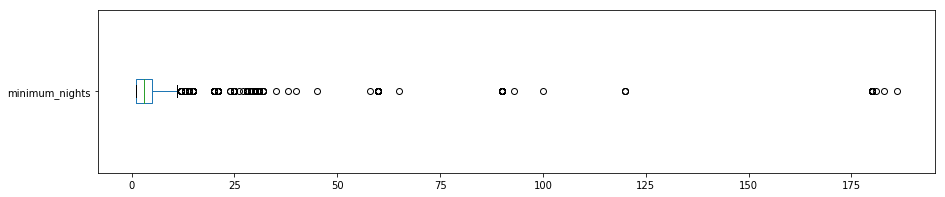


Cálculo de outliers para minimum_nights
Limite superior: 11.0
1995 entradas
8.5067%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores considerados por definição como outliers para minimum_nights
q3_soma_iiq_minimum_nights = df['minimum_nights'].quantile(.75) + 1.5*(df['minimum_nights'].quantile(.75) - df['minimum_nights'].quantile(.25))
print("\nCálculo de outliers para minimum_nights")
print("Limite superior: {}".format(q3_soma_iiq_minimum_nights))
print("{} entradas".format(len(df[df.minimum_nights > q3_soma_iiq_minimum_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > q3_soma_iiq_minimum_nights]) / df.shape[0])*100))

No `boxplot`da variável `minimum_nights` é possível observar visualmente como os valores do quarto quartil da amostra são dispersos. Existem desde imóveis onde a locação mínima são de 30 noites até mais de 175. Além disso, temos que aproximadamente 8.5% dos imóveis apresentam *outliers* na variável `minimum_nights`.

#### Boxplot para `price`

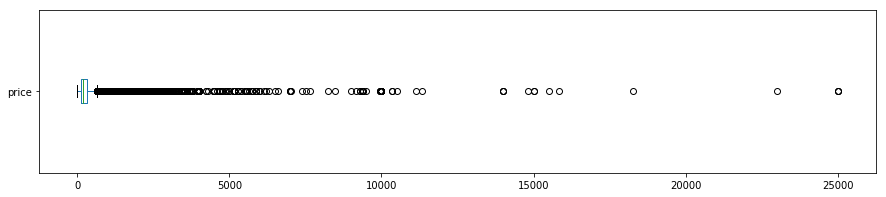


Cálculo de outliers para price
Limite superior: 648.5
1912 entradas
8.1528%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores considerados por definição como outliers para price
q3_soma_iiq_price = df['price'].quantile(.75) + 1.5*(df['price'].quantile(.75) - df['price'].quantile(.25))
print("\nCálculo de outliers para price")
print("Limite superior: {}".format(q3_soma_iiq_price))
print("{} entradas".format(len(df[df.price > q3_soma_iiq_price])))
print("{:.4f}%".format((len(df[df.price > q3_soma_iiq_price]) / df.shape[0])*100))

Pelo `boxplot`da variável `price` é possível observar a dispersão dos valores no quarto quartil. Existe uma maior concentração da imóveis com preço da diária abaixo de 5000, após esse preço as entradas ficam mais dispersas. Além disso, aproximadamente 8% das entradas são consideradas como `outliers` para a variável `price`. 

#### Boxplot para `number_of_reviews`

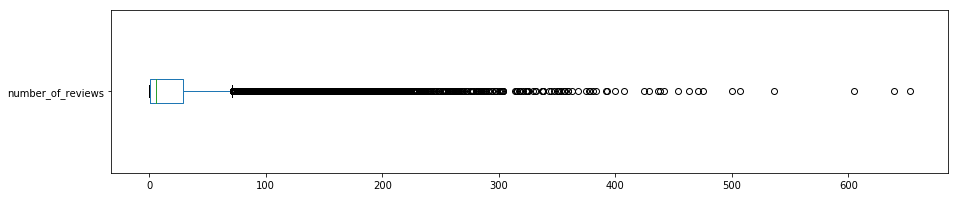


Cálculo de outliers para number_of_reviews
Limite superior: 71.0
2410 entradas
10.2763%


In [0]:
# number_of_reviews
df['number_of_reviews'].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores considerados por definição como outliers para price
q3_soma_iiq_number_of_reviews = df['number_of_reviews'].quantile(.75) + 1.5*(df['number_of_reviews'].quantile(.75) - df['number_of_reviews'].quantile(.25))
print("\nCálculo de outliers para number_of_reviews")
print("Limite superior: {}".format(q3_soma_iiq_number_of_reviews))
print("{} entradas".format(len(df[df.number_of_reviews > q3_soma_iiq_number_of_reviews])))
print("{:.4f}%".format((len(df[df.number_of_reviews > q3_soma_iiq_number_of_reviews]) / df.shape[0])*100))

Pelo `boxplot` do número de reviews observa-se uma forte concentração de entradas com menos de 300 reviews dentro quarto quartil. Aproximadamente 10% dos imóveis possuem `outliers` para a variável `number_of_reviews`.

#### Tratamento para *outliers*

O tratamento comum para *outliers* é a remoção desse valor discrepante da amostra. Porém, esse tratamento tem de ser feito com cautela. Por exemplo, se consideramos que os *outliers* da variável `price` não são os mesmos da varíavel `minimum_nights`, e que também não são os mesmos da variável `calculated_host_listings_count`, podemos excluir aproximadamente 27% das nossas observações. Isso é muita perda de informação! Nesse caso, é mais interessante excluir somente os *outliers* das variáveis de interesse, logo, é importante analisar cada caso separadamente.

Considerando o contexto turístico do Hawaii, é esperado que pessoas tenham vários imóveis para locação. Nesse caso, os *outliers* para a variável `calculated_host_listings_count` não serão removidos da amostra.

Para a variável `minimum_nights` serão excluídos somente os valores que não fazem sentido no contexto de locação. Por exemplo, não faz muito sentido ter imóveis em que a quantidade mínina de dias para locação seja maior que 30. Dificilmente um turista vai passar mais de 30 dias viajando pelo Hawaii. Nesse caso, os valores para `minimum_nights` que serão removidos da amostra serão aqueles superiores a 30.

Para a variável `price` serão excluídos somente os imóveis com preço superior a 5000. Ao analisarmos graficamente o `boxplot` da variável `price` é possível observar uma alta concentração de imóveis com preço abaixo desse valor, mesmo sendo considerados como *outliers*. Além disso, um imóvel em que a diária é 2500, por exemplo, pode ser considerado como *outlier* ao considerar todos os imóveis, mas talvez no bairro em que ele esteja incluído esse valor seja a média. 

Como a variável `number_of_reviews` não será considerada como objeto de análise,não serão feitas exclusões.

Além de *outliers* serão excluidos os imóveis onde `price` e `availability_365` são iguais a zero. 

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['minimum_nights'] > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['price'] > 5000].index, axis=0, inplace=True)

df_clean.drop(df_clean[df_clean['availability_365'] == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['price'] == 0].index, axis=0, inplace=True)

# fazendo o describe
df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].describe()

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
count,21831.000000,21831.000000,21831.000000,16835.000000,21831.000000,21831.000000
mean,44.097064,4.863314,304.715909,1.426299,25.390637,210.927076
std,68.253431,7.318537,381.190155,1.522625,45.358307,96.483113
min,1.000000,1.000000,10.000000,0.010000,0.000000,1.000000
25%,2.000000,1.000000,129.000000,0.330000,1.000000,147.000000
50%,7.000000,3.000000,199.000000,0.930000,6.000000,223.000000
75%,60.000000,4.000000,332.000000,2.050000,30.000000,284.000000
max,277.000000,30.000000,5000.000000,23.770000,653.000000,365.000000


Ao excluir da amostra os *outliers* das variáveis `minimum_nights` e `price`, é possível observar que a média de ambas as variáveis se aproximam mais da mediana.


#### Histograma para as variáveis após tratamento de *outliers*

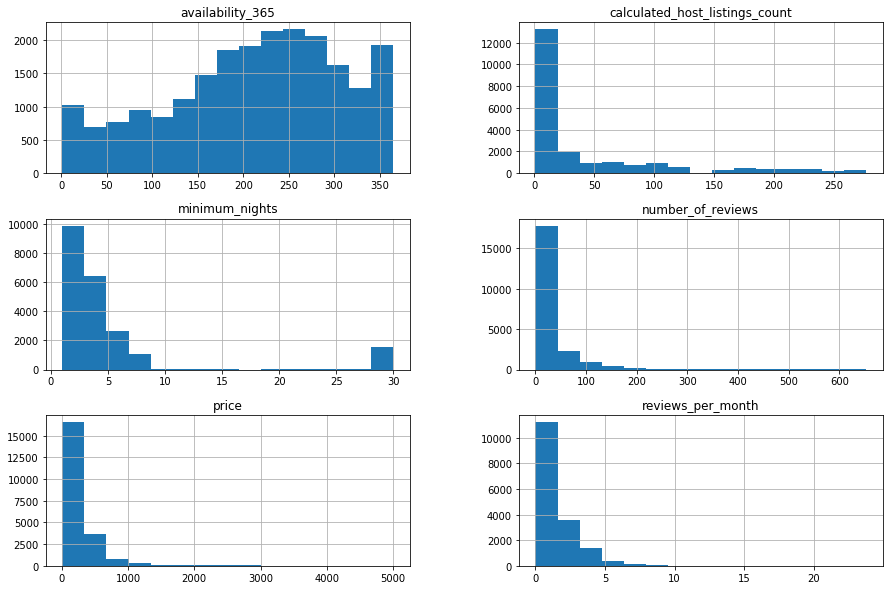

In [0]:
# plotar o histograma para as variáveis numéricas
df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].hist(bins=15, figsize=(15,10));

Através do histograma de `minimum_nights` e `price` é possível observar que a distribuição ainda está apresentando indícios de *outliers*, o que era esperado já que só retiramos os *outliers* que eram muito discrepantes ou que não faziam sentido no contexto dos dados. 

### **Q5. Qual a correlação existente entre as variáveis**

Se dizemos que duas coisas são correlacionadas significa que existe uma relação entre essas duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação.
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

Assim como para as análises feitas anteriormente, serão utilizadas somente as variáveis númericas `calculated_host_listings_count`, `minimum_nights`, `price`, `reviews_per_month`, `number_of_reviews`, `availability_365`.



In [0]:
# criar uma matriz de correlação
corr = df_clean[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
calculated_host_listings_count,1.000000,-0.102610,0.150126,-0.293744,-0.269901,0.103886
minimum_nights,-0.102610,1.000000,0.001126,-0.091046,-0.041532,-0.026635
price,0.150126,0.001126,1.000000,-0.254276,-0.206463,0.059383
reviews_per_month,-0.293744,-0.091046,-0.254276,1.000000,0.618039,-0.101356
number_of_reviews,-0.269901,-0.041532,-0.206463,0.618039,1.000000,-0.018126
availability_365,0.103886,-0.026635,0.059383,-0.101356,-0.018126,1.000000


Utilizando a tabela de correlações é possível tirar *insights* da relação entre as variáveis. Porém, o gráfico de *heatmap* nos apresenta os mesmos valores e com a possibilidade de analisar visualmente.

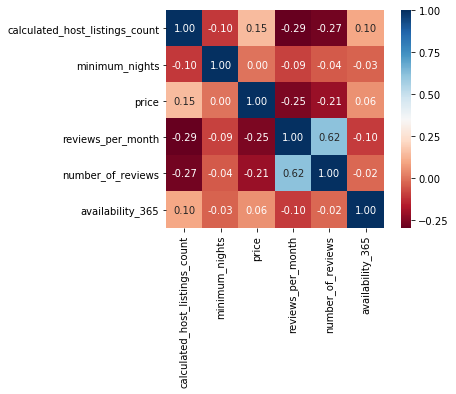

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando o *heatmap* é possível inferir que:
* A diagonal do gráfico tem valor 1 porquê está calculando a correlação da variável com ela mesma.
* A variável `price` apresenta uma correlação negativa com `reviews_per_month` e `number_of_reviews`. Isso nos permite observar que imóveis anunciados que são mais caros possuem um número menor de reviews.
* As variáveis `reviews_per_month` e `number_of_reviews` possuem uma relação negativa com `calculated_host_listings_count`, ou seja, imóveis anunciados por anfitriões que possuem vários imóveis estão associados a anúncios com menos reviews.
* A variável `price`e `calculated_host_listings_count` possuem uma correlação positiva, imóveis mais caros estão associados a anfitriões que possuem um maior número de anúncios. O que faz sentido, de acordo com as duas afirmações anteriores.
* As demais correlações não são tão intensas quuanto as anteriores. Mas cabe ressaltar que a variável `calculated_host_listings_count` possui uma correlação negativa com `minimum_nights`. Imóveis associados a anfitriões que possuem mais anúncios são aqueles com um número menor de noites mínimas necessárias para a locação. Além disso, `calculated_host_listings_count` possui uma correlação positiva com `availability_365`, ou seja, imóveis de anfitriões com vários anúncios estão associados com uma disponibilidade maior durante o ano.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts().sort_values(ascending = False)


Entire home/apt    19334
Private room        2142
Hotel room           267
Shared room           88
Name: room_type, dtype: int64

O tipo de imóvel mais disponível para locação no Airbnb é do tipo apartamentos/casas inteiras. Enquanto os quartos compartilhados é o tipo com menos imóvel disponível para locação.

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean['room_type'].value_counts() / df_clean.shape[0]).sort_values(ascending = False)


Entire home/apt    0.885621
Private room       0.098117
Hotel room         0.012230
Shared room        0.004031
Name: room_type, dtype: float64

Aproximadamente 90% dos imóveis disponíveis no Airbnb no Hawaii são apartamentos/casas inteiras. Enquanto isso quartos de hoteis anúnciados no Airbnb são pouco mais de 1%.

No breve histórico sobre o Hawaii, foi mostrado que o arquipélago é composto de seis grandes ilhas: Kauai, Oahu, Molokai, Maui, Lanai e Ilha do Hawaii. No dataset nos temos que a variável `neighbourhood_group` , que nos diz o nome do grupo no qual o bairro do imóvel em questão está localizado. 

In [0]:
df_clean['neighbourhood_group'].unique()

array(['Honolulu', 'Hawaii', 'Kauai', 'Maui'], dtype=object)

No caso, o dataset está mostrando em qual ilha está inserido o imóvel. No caso a ilha de Molokai e Lanai não possuem nenhum imóvel disponível. Pelo contexto faz sentido, dado que a ilha de Molokai é uma ilha mais preservada e Lanai é mais conhecida por grandes resorts. 

O grupo *Honolulu* se refere a ilha Oahu, onde está a capital Honolulu, e o grupo *Hawaii* se refere a Ilha do Hawaii.

Tendo essa informação, é interessante observar qual ilha possui mais imóveis anunciados e qual sua proporção no total dos imóveis.

In [0]:
df_clean['neighbourhood_group'].value_counts().sort_values(ascending = False)

Maui        7335
Honolulu    6220
Hawaii      5308
Kauai       2968
Name: neighbourhood_group, dtype: int64

In [0]:
(df_clean['neighbourhood_group'].value_counts() / df_clean.shape[0]).sort_values(ascending = False)

Maui        0.335990
Honolulu    0.284916
Hawaii      0.243140
Kauai       0.135953
Name: neighbourhood_group, dtype: float64

Pelos resultados, a ilha que possui o maior número de imóveis disponíveis é a ilha Maui, seguida da ilha Oahu, Ilha do Hawaii e ilha Kauai. 

Como temos as informações relativas a latitude e longitude, iremos plotar o mapa da localização dos imóveis, identificado os imóveis por ilha.

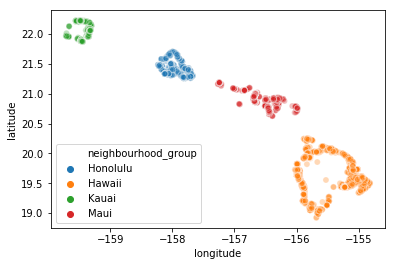

In [0]:
# plotar os imóveis pela latitude-longitude, separado por ilhas
sns.scatterplot(y='latitude',x='longitude', hue='neighbourhood_group', data=df_clean,alpha=0.3);

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar as ilhas (`neighbourhoods_groups`) a partir do preço de locação.



In [0]:
# ver preços por ilha, na média
df_clean.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)


neighbourhood_group
Maui        363.212134
Kauai       349.360849
Hawaii      271.210437
Honolulu    243.023151
Name: price, dtype: float64

No caso, a ilha que tem a maior média de preço de imóveis é a ilha Maui. Curiosamente, é a ilha que tem o maior número de imóveis anunciados também.

Ao analisar as estatísticas descritivas do dataset, vimos que o imóvel mais caro custa 5000 por dia. 

In [0]:
df_clean[df_clean['price'] == 5000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5835,14823754,Mele Komo,92684687,Bj,Honolulu,Koolaupoko,21.40193,-157.73828,Entire home/apt,5000,30,2,2017-08-24,0.06,2,346


Ao ver o anúncio do imóvel observamos que o mesmo está localizado na ilha Oahu (Honolulu). Mas ao analisar a média do preço de imóveis por ilha, vimos que a ilha Oahu tem a menor média de preço da diária. 

Mais uma vez, como temos as informações relativas a latitude e longitude, iremos plotar o mapa da localização dos imóveis, mas dessa vez classificando pelo preço dos imóveis.

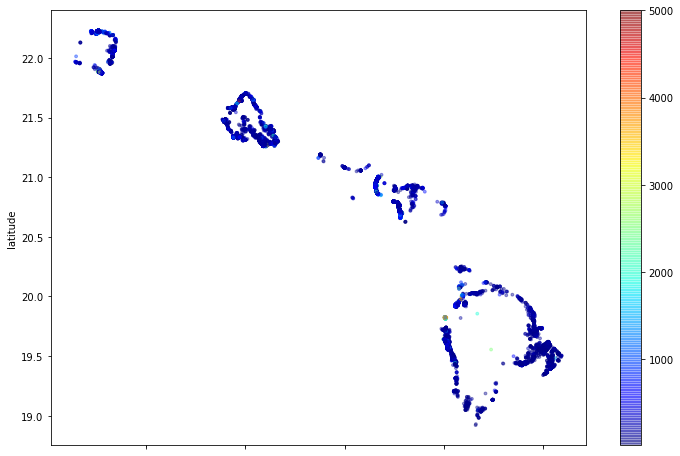

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


O objetivo do *notebook* era realizar uma análise exploratória nos dados dos imóveis anunciados no Airbnb para o estado de Hawaii. Dentro da análise foi visto que o dataset disponibilizado é bem completo, tendo poucos valores ausentes. Caso o objeto de uma análise qualquer não seja relacionado às reviews feitas pelas pessoas que alugaram os imóveis, teríamos somente dois valores ausentes em mais de 20000 entradas.

Foi visto também que algumas variáveis numéricas possuem *outliers*. Mas cabe ao usuário dos dados decidir qual o melhor procedimento quanto a isso. O procedimento feito nesse *notebook* foi remover da amostra somente os valores muito discrepantes ou que não faziam sentido no contexto. Além disso, houve a exclusão de algumas entradas com problemas na variável `price` e `availability_365`, de acordo também com o contexto dos dados.

Na análise da correlação, o *insight* tirado foi na relação entre preço, reviews e número de imóveis do mesmo anfitrião. Imóveis de anfitriões que possuem outros imóveis anunciados tendem a serem mais caros e terem menos reviews. Provavelmente, como são mais caros, os imóveis são alugados com menos frequência, logo terão menos reviews. Como o anfitrião tem muitos imóveis, ele pode anunciar os imóveis com um preço mais alto, ele perde dinheiro na frequência de locação dos imóveis mas ganha na quantidade.

O arquipélago do Hawaii é composto por seis ilhas principais, mas só quatro delas tem imóveis disponíveis para locação pelo Airbnb. A ilha de Maui possui o maior número de imóveis disponível para locação e a maior média de preço na diária. Porém, o imóvel mais caro está na ilha Oahu, onde a capital Honolulu está localizada.

Mas se analisarmos a média do preço da diária dos imóveis, percebemos que a diferença não é muito grande. Nesse caso, é interessante realizar um teste estatístico para inferir se a diferença na média de preço é estatísticamente significativa. Ou seja, se realmente a média de preço na diária é maior ou menor dependendo da ilha.